## Labo Reinforcement Learning 2024 - 2025

### Het mountain-car probleem: Simulatie in GYM

GYM is een Python API waarin single agent RL problemen kunnen gesimuleerd worden. De module bevat verschillende typische problemen waarop je je RL algoritmen kan testen. Je kan ook zelf nieuwe problemen hierin formuleren.
In deze notebook experimenteren we met het mountain-car probleem.
Voor een beschrijving van het probleem, zie [hier](https://gymnasium.farama.org/environments/classic_control/mountain_car/)
In deze notebook kan je via onderstaande stappen een Q-learning agent trainen om het probleem aan te pakken.


In [ ]:
%pip install -U gym

In [ ]:
%pip install gymnasium[classic_control]

### Stap 1: het probleem laden en renderen

In [9]:
import gymnasium as gym
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env.reset()

(array([-0.5320322,  0.       ], dtype=float32), {})

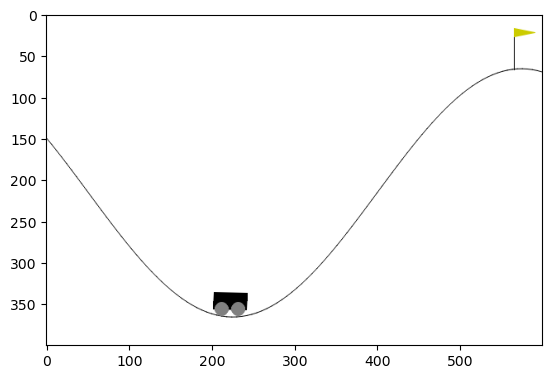

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from IPython.display import clear_output
env_screen = env.render()
env.close()
plt.imshow(env_screen)

De render mode bepaalt waar je de simulatie ziet:


In [19]:
import gymnasium as gym
env = gym.make('MountainCar-v0', render_mode='human')
env.reset()

(array([-0.56928974,  0.        ], dtype=float32), {})

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from IPython.display import clear_output
env_screen = env.render()

#plt.imshow(env_screen)

In [23]:
env.close()

### Stap 2: Beschrijving van het probleem in GYM

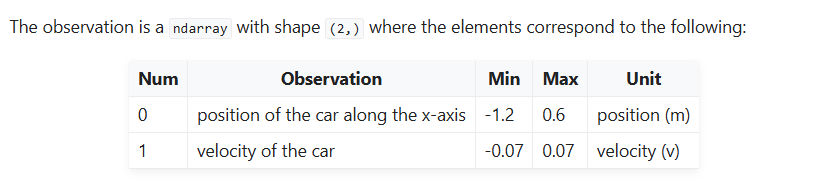

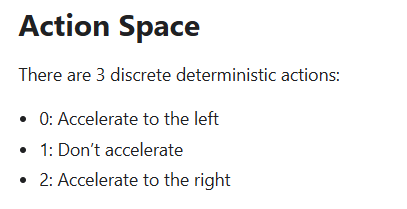

Elke actie krijgt een penalty van $-1$ zolang de vlag niet bereikt is. Het doel is dus om in zo min mogelijk stappen het doel te bereiken.

De transitiefunctie die onderliggend gebruikt wordt om van state naar state door acties te selecteren is beschreven via volgende fysische vergelijkingen:

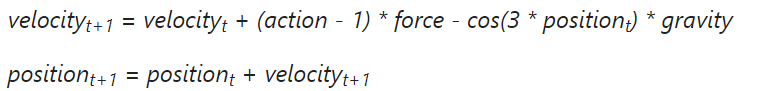

met $force = 0.001$ en $gravity = 0.0025$

In [25]:
# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)


In [42]:
import time 
env = gym.make('MountainCar-v0', render_mode='human')
num_steps = 300

obs = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, done, info, _ = env.step(action)
    
    # Render the env
    env.render()

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()

# Close the env
env.close()

### 3. Toestandsruimte discreet maken

De observatie of state space is dus continue en moeten we naar discrete (eindig aantal) toestanden omzetten. (We gaan immers Qlearning willen gebruiken) Hoe kan je dit doen?
Je kan gebruik maken van het feit dat je een ondergrens en bovengrens kent van zowel de positie als de snelheid van de auto. De intervallen waarin deze waarden zich bevinden kan je dan in een aantal vooraf gekozen deelintervallen splitsen. 

In [28]:
print("Upper Bound for Env Observation", env.observation_space.high)
print("Lower Bound for Env Observation", env.observation_space.low)

Upper Bound for Env Observation [0.6  0.07]
Lower Bound for Env Observation [-1.2  -0.07]


In [33]:
# grootte van de intervallen:
breedte = (env.observation_space.high - env.observation_space.low)
print(breedte) 
#intervallen stretchen
breedte = breedte * np.array([10, 100])
print(breedte)
# ceil nemen
num_states = np.round(breedte, 0).astype(int) + 1
print(f'aantal discrete toestanden: {num_states}')

[1.8000001 0.14     ]
[18.00000072 14.00000006]
aantal discrete toestanden: [19 15]


In [58]:
obs = env.observation_space.low
print(obs)
state_discreet = (obs - env.observation_space.low)*np.array([10, 100])
state_discreet = np.round(state_discreet, 0).astype(int)
state_discreet

[-1.2  -0.07]


array([0, 0])

In [60]:
obs = env.observation_space.high
print(obs)
state_discreet = (obs - env.observation_space.low)*np.array([10, 100])
state_discreet = np.round(state_discreet, 0).astype(int)
state_discreet

[0.6  0.07]


array([18, 14])

In [35]:
def discretize(obs, env):
    stretch = (obs - env.observation_space.low) * np.array([10, 100])
    return np.round(stretch,0).astype(int)

env = gym.make('MountainCar-v0', render_mode='human')
print(discretize(env.observation_space.high, env))
print(discretize(env.observation_space.low, env))

[18 14]
[0 0]


In deze herwerkte toestandsruimte, wat moet de grootte van de Q-tabel worden?


In [45]:
# Initialize Q table
qtable = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1], env.action_space.n))
qtable.shape

(19, 15, 3)

### 4. Implementatie van de RL agent

Implementeer een Q-learning agent die een Q-tabel leert zodat je deze kan uitlezen en op een greedy manier kan gebruiken om de optimale policy in de gym-omgeving te gebruiken als actie-selectie.  Log meteen ook de average reward per episode tijdens het leren zodat je deze kan uitzetten in een grafiek.
Kies zelf de instellingen van je parameters: learning rate, discount-factor, temperatuur decay of $\epsilon$ decay, aantal episodes, ...

In [ ]:
def training_van_QLAgent(instellen_van_params)
    for i in range(episodes):
           # XXX run Q-learning algo (actieselectie, reward update, next_state, ...)
    
    return rewards, qtable

Text(0.5, 1.0, 'Average Reward vs Episodes')

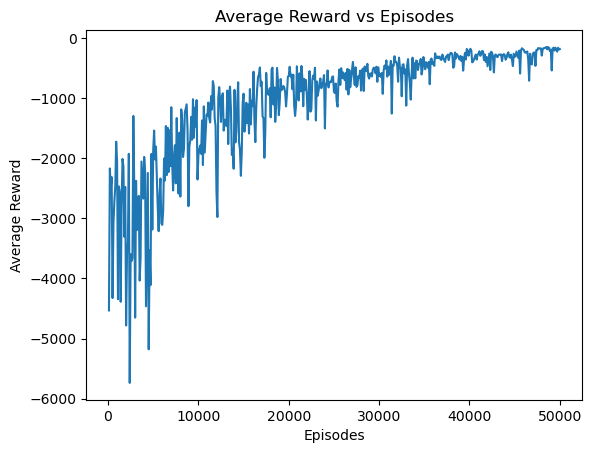

In [99]:
import gymnasium as gym
env = gym.make('MountainCar-v0', render_mode='rgb_array')
rewards, qtable = # XXX  
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

De geleerde qtable kan je nu gebruiken om een greedy policy te volgen en de simulatie hiermee te renderen. Het autootje bereikt nu hopelijk wel de vlag!

In [101]:
def my_greedy_agent(state,table):
    # XXX gebruik je qtable hier om greedy acties te nemen 
    return action

In [103]:
import time 

import gymnasium as gym
env = gym.make('MountainCar-v0', render_mode='human')
num_steps = 500

state_0 = env.reset()
obs = state_0[0]

for step in range(num_steps):
 
    action = my_greedy_agent(obs, table) 
    # apply the action
    obs, reward, done, info, _ = env.step(action)
    
    # Render the env
    env.render()

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()

# Close the env
env.close()